## Task 4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../Module 2/week3.csv')
df.head(10)

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend,14_day_MA,14_day_STD,Upper Band,Lower Band
0,2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,...,712450,78.39,2017,5,0.000000,Slight or No Change,NaN,NaN,NaN,NaN
1,2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,...,1167534,64.84,2017,5,2.708131,Positive,NaN,NaN,NaN,NaN
2,2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,...,1031752,71.74,2017,5,1.078567,Positive,NaN,NaN,NaN,NaN
3,2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,...,1135613,44.20,2017,5,3.292810,Among top gainers,NaN,NaN,NaN,NaN
4,2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,...,517461,57.94,2017,5,-1.145414,Negative,NaN,NaN,NaN,NaN
5,2017-05-22,TCS,EQ,2507.15,2510.0,2553.75,2510.00,2535.00,2531.35,2530.69,...,509741,61.27,2017,5,0.965239,Slight positive,NaN,NaN,NaN,NaN
6,2017-05-23,TCS,EQ,2531.35,2533.2,2564.15,2514.00,2523.70,2521.70,2530.49,...,995551,72.44,2017,5,-0.381220,Slight or No Change,NaN,NaN,NaN,NaN
7,2017-05-24,TCS,EQ,2521.70,2534.8,2570.00,2529.65,2567.10,2559.15,2545.01,...,918505,72.48,2017,5,1.485109,Positive,NaN,NaN,NaN,NaN
8,2017-05-25,TCS,EQ,2559.15,2577.0,2637.55,2568.00,2615.05,2624.60,2605.40,...,1180439,57.67,2017,5,2.557490,Positive,NaN,NaN,NaN,NaN
9,2017-05-26,TCS,EQ,2624.60,2625.0,2626.85,2564.65,2570.05,2578.25,2593.00,...,390827,57.37,2017,5,-1.765983,Negative,NaN,NaN,NaN,NaN


In [3]:
def call_entry(stock_price, upper_band, middle_band, lower_band):
    
    if stock_price < lower_band:
        return 'Buy'
    elif stock_price >= lower_band and stock_price < middle_band:
        return 'Hold_Buy'
    elif stock_price >= middle_band and stock_price < upper_band:
        return 'Hold_Short'
    elif stock_price >= upper_band:
        return 'Short'

In [4]:
df['Call'] = df.apply(lambda row: call_entry(row['Close Price'], row['Upper Band'], row['14_day_MA'], row['Lower Band']), axis =1)

In [5]:
df['Call'].value_counts()

Hold_Short    261
Hold_Buy      181
Short          24
Buy            15
Name: Call, dtype: int64

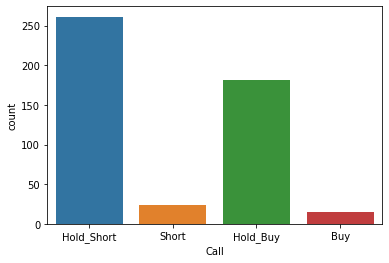

In [6]:
sns.countplot(x='Call', data=df);

In [7]:
df.dropna(inplace=True)
df.head(10)

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend,14_day_MA,14_day_STD,Upper Band,Lower Band,Call
13,2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,...,68.52,2017,6,0.274876,Slight or No Change,2523.725000,66.942093,2657.609185,2389.840815,Hold_Short
14,2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,...,75.53,2017,6,0.442513,Slight or No Change,2537.996429,49.565983,2637.128396,2438.864462,Hold_Short
15,2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,...,65.40,2017,6,1.522477,Positive,2550.482143,41.378230,2633.238603,2467.725683,Hold_Short
16,2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,...,63.51,2017,6,3.535014,Among top gainers,2567.671429,48.235618,2664.142666,2471.200192,Short
17,2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,...,51.37,2017,6,-2.995178,Negative,2573.317857,48.890532,2671.098920,2475.536794,Hold_Short
18,2017-06-08,TCS,EQ,2615.25,2598.00,2604.95,2515.50,2520.00,2521.60,2543.44,...,40.73,2017,6,-3.580920,Among top losers,2574.350000,47.519494,2669.388988,2479.311012,Hold_Buy
19,2017-06-09,TCS,EQ,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,...,38.07,2017,6,-0.578997,Slight negative,2572.610714,49.613895,2671.838503,2473.382925,Hold_Buy
20,2017-06-12,TCS,EQ,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,...,37.71,2017,6,-0.789789,Slight negative,2570.146429,53.073296,2676.293021,2463.999836,Hold_Buy
21,2017-06-13,TCS,EQ,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,...,45.62,2017,6,-1.433339,Negative,2562.460714,61.852978,2686.166669,2438.754759,Hold_Buy
22,2017-06-14,TCS,EQ,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,...,61.31,2017,6,0.760743,Slight positive,2551.432143,63.659683,2678.751509,2424.112777,Hold_Buy


In [8]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Call'] = label.fit_transform(df['Call'])

df.head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend,14_day_MA,14_day_STD,Upper Band,Lower Band,Call
13,2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,...,68.52,2017,6,0.274876,Slight or No Change,2523.725000,66.942093,2657.609185,2389.840815,2
14,2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,...,75.53,2017,6,0.442513,Slight or No Change,2537.996429,49.565983,2637.128396,2438.864462,2
15,2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,...,65.40,2017,6,1.522477,Positive,2550.482143,41.378230,2633.238603,2467.725683,2
16,2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,...,63.51,2017,6,3.535014,Among top gainers,2567.671429,48.235618,2664.142666,2471.200192,3
17,2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,...,51.37,2017,6,-2.995178,Negative,2573.317857,48.890532,2671.098920,2475.536794,2


In [9]:
X = df[['Upper Band', 'Lower Band', '14_day_MA', 'Close Price']]
y = df['Call']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 0.23095615,  0.30428996,  0.30105728,  0.36251412],
       [ 0.19390127,  0.40928691,  0.33291548,  0.38661825],
       [ 0.18686365,  0.47110076,  0.36078742,  0.46991616],
       ...,
       [-0.50040292, -0.32117121, -0.47608037, -0.45030707],
       [-0.50109169, -0.31913199, -0.47544257, -0.52869883],
       [-0.49845636, -0.32876872, -0.47883886, -0.54373725]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [12]:
X_train.shape,X_test.shape

((384, 4), (97, 4))

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
Linear_SVM = SVC(kernel="linear", C=0.025)
RBF_SVM = SVC(kernel='rbf', gamma=2, C=1)
Decision_Tree = DecisionTreeClassifier(max_depth=5)
Random_Forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=4)
Naive_Bayes = GaussianNB()

models = [knn,Linear_SVM,RBF_SVM,Decision_Tree,Random_Forest,Naive_Bayes]

In [16]:
pipe = {0:'K Nearest Neighbors Classifier' , 1:'Linear SVM' , 2:'RBF SVM' , 3:'Decision Tree' , 4:'Random Forest' , 5:'Naive Bayes'}

In [17]:
best_acc = 0.0
best_model_name = ''
curr_score = 0.0

for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    curr_score = model.score(X_test, y_test)*100
    print('%s Model test accuracy: %.3f' % (pipe[idx], curr_score))
    if curr_score > best_acc:
        best_acc = curr_score
        best_model_name = pipe[idx]
        best_model = model

print('Classifier with best accuracy is: %s with %.3f' % (best_model_name, best_acc))

filename = 'best_model.pkl'
pickle.dump(best_model,open(filename, 'wb'))
print('Saved best model to file')


K Nearest Neighbors Classifier Model test accuracy: 88.660
Linear SVM Model test accuracy: 59.794
RBF SVM Model test accuracy: 86.598
Decision Tree Model test accuracy: 83.505
Random Forest Model test accuracy: 81.443
Naive Bayes Model test accuracy: 53.608
Classifier with best accuracy is: K Nearest Neighbors Classifier with 88.660
Saved best model to file


In [18]:
df_new = pd.read_csv('../Stocks/Large_Cap/INFY.csv')
df_new.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,15-May-2017,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
1,INFY,EQ,16-May-2017,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2,INFY,EQ,17-May-2017,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
3,INFY,EQ,18-May-2017,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
4,INFY,EQ,19-May-2017,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48
5,INFY,EQ,22-May-2017,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92
6,INFY,EQ,23-May-2017,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11
7,INFY,EQ,24-May-2017,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91
8,INFY,EQ,25-May-2017,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73
9,INFY,EQ,26-May-2017,983.30,987.00,1000.00,980.60,996.05,995.70,994.06,2494002,2.479194e+09,63671,1477643,59.25


In [19]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

In [20]:
df_new = df_new.set_index('Date')
df_new.rename_axis(None, inplace=True)
df_new.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [21]:
df_new['Middle_band'] = df_new['Close Price'].rolling(14).mean()

In [22]:
df_new['Lower_band'] = df_new['Middle_band'] - 2*df_new['Close Price'].rolling(14).std()
df_new['Upper_band'] = df_new['Middle_band'] + 2*df_new['Close Price'].rolling(14).std()

df_new['Call'] = df_new.apply(lambda row: call_entry(row['Close Price'], row['Upper_band'], row['Middle_band'], row['Lower_band']), axis =1)

df_new.dropna(inplace = True)
df_new.head(10)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Middle_band,Lower_band,Upper_band,Call
2017-06-01,INFY,EQ,977.05,969.30,979.70,958.55,971.25,971.40,969.49,2754303,2.670263e+09,81421,1822506,66.17,968.671429,936.708789,1000.634068,Hold_Short
2017-06-02,INFY,EQ,971.40,973.40,975.45,964.20,966.00,969.45,968.76,1958983,1.897793e+09,48927,1396644,71.29,969.950000,939.543472,1000.356528,Hold_Buy
2017-06-05,INFY,EQ,969.45,970.00,972.00,957.05,959.00,958.75,961.71,2731349,2.626761e+09,83794,1941199,71.07,970.217857,940.316774,1000.118940,Hold_Buy
2017-06-06,INFY,EQ,958.75,965.00,987.50,964.40,980.00,979.35,980.08,3504343,3.434526e+09,83178,2018029,57.59,972.114286,943.638076,1000.590495,Hold_Short
2017-06-07,INFY,EQ,979.35,985.00,988.90,945.00,959.30,961.30,963.75,6227523,6.001805e+09,139990,2519343,40.45,972.082143,943.554569,1000.609717,Hold_Buy
2017-06-08,INFY,EQ,961.30,962.95,962.95,948.15,956.05,956.45,952.81,3097676,2.951502e+09,88147,1778850,57.43,971.975000,943.208520,1000.741480,Hold_Buy
2017-06-09,INFY,EQ,956.45,938.55,950.95,923.00,949.00,948.60,937.55,7378831,6.918028e+09,161124,3054942,41.40,971.057143,940.106913,1002.007372,Hold_Buy
2017-06-12,INFY,EQ,948.60,943.35,965.20,940.10,964.40,963.85,953.95,4295838,4.097997e+09,89686,2215716,51.58,971.525000,941.280617,1001.769383,Hold_Buy
2017-06-13,INFY,EQ,963.85,953.50,962.95,951.60,957.95,957.80,958.26,2468897,2.365834e+09,69355,1449584,58.71,971.739286,941.966526,1001.512045,Hold_Buy
2017-06-14,INFY,EQ,957.80,960.00,961.90,951.20,958.50,958.60,957.02,3719055,3.559195e+09,90312,2710765,72.89,969.975000,940.225953,999.724047,Hold_Buy


In [23]:
X = df_new[['Upper_band', 'Lower_band', 'Middle_band', 'Close Price']]
df_new['Call'] = label.fit_transform(df_new['Call'])
y = df_new['Call']

In [24]:
X = scaler.fit_transform(X)
X

array([[-0.05502796,  0.10945664,  0.02533611,  0.0517726 ],
       [-0.05615428,  0.12211726,  0.03125418,  0.04305747],
       [-0.05711847,  0.12557108,  0.032494  , -0.00476401],
       ...,
       [-1.08791168, -0.90968964, -1.09179033, -1.06711605],
       [-1.08690399, -0.9154245 , -1.09418732, -1.0858871 ],
       [-1.08759081, -0.91297779, -1.09331118, -1.0731496 ]])

In [25]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result*100)

65.63146997929607


## Task 4.2

In [26]:
df2 = pd.read_csv('../Stocks/Mid_Cap/VOLTAS.csv')
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10


In [27]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')
df2.rename_axis(None, inplace=True)
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2017-05-15,VOLTAS,EQ,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
2017-05-16,VOLTAS,EQ,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2017-05-17,VOLTAS,EQ,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
2017-05-18,VOLTAS,EQ,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
2017-05-19,VOLTAS,EQ,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10


In [28]:
df2['Day_Perc_Change_OC'] = df2[['Open Price','Close Price']].pct_change(axis=1)['Close Price']*100
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change_OC
2017-05-15,VOLTAS,EQ,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.951835
2017-05-16,VOLTAS,EQ,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104167
2017-05-17,VOLTAS,EQ,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.103448
2017-05-18,VOLTAS,EQ,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.587626
2017-05-19,VOLTAS,EQ,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.337879


In [29]:
df2['Day_Perc_Change_LH'] = df2[['Low Price','High Price']].pct_change(axis=1)['High Price']*100
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change_OC,Day_Perc_Change_LH
2017-05-15,VOLTAS,EQ,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.951835,1.464776
2017-05-16,VOLTAS,EQ,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104167,1.741351
2017-05-17,VOLTAS,EQ,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.103448,1.813926
2017-05-18,VOLTAS,EQ,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.587626,3.464987
2017-05-19,VOLTAS,EQ,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.337879,2.177881


In [30]:
df2['5_day_mean']    = (df2['Close Price'].pct_change()*100).rolling(5).mean()
df2['5_day_std']     = (df2['Close Price'].pct_change()*100).rolling(5).std()
df2.dropna(inplace=True)
df2.head(6)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change_OC,Day_Perc_Change_LH,5_day_mean,5_day_std
2017-05-22,VOLTAS,EQ,415.75,420.0,420.00,413.85,417.00,415.65,415.98,633783,2.636431e+08,17175,243815,38.47,-1.035714,1.486046,-0.749880,1.706140
2017-05-23,VOLTAS,EQ,415.65,420.0,420.00,403.40,405.95,409.85,410.31,1795730,7.367989e+08,44062,523655,29.16,-2.416667,4.115022,-1.056748,1.643131
2017-05-24,VOLTAS,EQ,409.85,428.0,450.80,423.10,447.15,446.50,443.90,17793994,7.898705e+09,167272,5533301,31.10,4.322430,6.546916,0.835769,4.811042
2017-05-25,VOLTAS,EQ,446.50,451.0,484.00,443.20,476.15,474.75,462.79,6345884,2.936783e+09,71716,1250047,19.70,5.266075,9.205776,2.849656,4.513846
2017-05-26,VOLTAS,EQ,474.75,470.1,501.75,470.10,499.75,498.50,494.63,7060217,3.492227e+09,72145,1747315,24.75,6.041268,6.732610,3.770492,4.355642
2017-05-29,VOLTAS,EQ,498.50,496.9,499.75,482.25,485.50,484.60,485.77,3146132,1.528283e+09,31950,1663513,52.87,-2.475347,3.628823,3.217629,5.073909


In [31]:
df2['Action'] = np.where( df2['Close Price'].shift(-1) > df2['Close Price'], 1, -1 )
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change_OC,Day_Perc_Change_LH,5_day_mean,5_day_std,Action
2017-05-22,VOLTAS,EQ,415.75,420.0,420.00,413.85,417.00,415.65,415.98,633783,2.636431e+08,17175,243815,38.47,-1.035714,1.486046,-0.749880,1.706140,-1
2017-05-23,VOLTAS,EQ,415.65,420.0,420.00,403.40,405.95,409.85,410.31,1795730,7.367989e+08,44062,523655,29.16,-2.416667,4.115022,-1.056748,1.643131,1
2017-05-24,VOLTAS,EQ,409.85,428.0,450.80,423.10,447.15,446.50,443.90,17793994,7.898705e+09,167272,5533301,31.10,4.322430,6.546916,0.835769,4.811042,1
2017-05-25,VOLTAS,EQ,446.50,451.0,484.00,443.20,476.15,474.75,462.79,6345884,2.936783e+09,71716,1250047,19.70,5.266075,9.205776,2.849656,4.513846,1
2017-05-26,VOLTAS,EQ,474.75,470.1,501.75,470.10,499.75,498.50,494.63,7060217,3.492227e+09,72145,1747315,24.75,6.041268,6.732610,3.770492,4.355642,-1


In [32]:
df2['Action'].value_counts()

-1    251
 1    238
Name: Action, dtype: int64

In [33]:
X = df2[['Day_Perc_Change_OC', 'Day_Perc_Change_LH', '5_day_mean','5_day_std']]
y = df2['Action']

In [34]:
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [35]:
model = RandomForestClassifier(n_estimators=10, max_features=2, random_state=17)

In [36]:
model.fit(X_train,  y_train)
model.score(X_test, y_test)

0.5374149659863946

In [37]:
from sklearn.metrics import plot_confusion_matrix

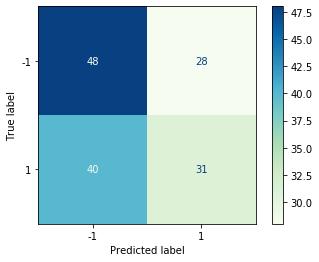

In [38]:
plot_confusion_matrix(model, X_test, y_test, cmap = 'GnBu');

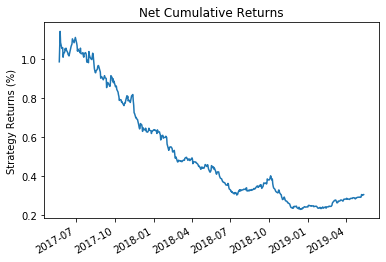

In [39]:
cumulative_returns = (1 + (df2['Close Price'].pct_change()* df2['Action'])).cumprod()
cm = cumulative_returns.plot(title = "Net Cumulative Returns")
cm.set_ylabel("Strategy Returns (%)");